In [1]:
import os
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import nibabel as nib
from utils.preproc import FUSCleaner, load_data
from utils.glm import run_glm_analysis, compute_contrasts, plot_contrasts
import scipy.io as sio

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
load_dotenv()
base_dir = os.getenv('BASE_DIR')
zion_task_dir = os.path.join(base_dir, 'task_data', 'audiocue_acrossday', 'zion')
grouper_task_dir = os.path.join(base_dir, 'task_data', 'audiocue_acrossday', 'grouper')

In [3]:
def extract_event_df(data):
    events = []

    for trial in data:
        # Access 'AbsoluteTrialStartTime', 'CodeTimes', and 'CodeNumbers'
        absolute_time = trial["AbsoluteTrialStartTime"][0][0]
        code_times = trial["BehavioralCodes"][0]['CodeTimes'][0] # Extract the inner array for times
        code_numbers = trial["BehavioralCodes"][0]['CodeNumbers'][0]  # Extract the inner array for numbers

        # Find the cue start time (CodeNumbers == 2)
        cue_idx = np.where(code_numbers == 2)[0]
        if len(cue_idx) > 0:
            cue_time = code_times[cue_idx[0]][0]

            # Find the trial start times for conditions 5, 6, and 7
            for trial_type in [5, 6, 7]:
                trial_idx = np.where(code_numbers == trial_type)[0]
                if len(trial_idx) > 0:
                    if trial_type == 7:
                        trial_start_time = code_times[trial_idx[0]][0] - 2000
                    else:
                        trial_start_time = code_times[trial_idx[0]][0]
                    
                    # Calculate onset and duration
                    onset = absolute_time + cue_time
                    duration = trial_start_time - cue_time + 6
                    
                    # Append to events list as a dictionary
                    events.append({
                        'onset': onset/1000,
                        'trial_type': str(trial_type),
                        'duration': duration/1000
                    })

    # Convert the events list to a pandas DataFrame
    event_df = pd.DataFrame(events)
    
    return event_df

# Zion

## 1002

In [4]:
data_dir = os.path.join(zion_task_dir, '1002')
brain_file = 'Zion_100224_audiocue_2Dscan_1.nii'
event_file = 'mldata.mat'
brain_data, event_data = load_data(data_dir, brain_file, event_file)
tr = 1/2.5 
cleaner = FUSCleaner(detrend=True, standardize=False, low_pass=0.5, high_pass=0.01, fs=2.5, sigma=1)
cleaned_data = cleaner.clean(brain_data)
event_df = extract_event_df(event_data)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 9000)


### Cleaned data

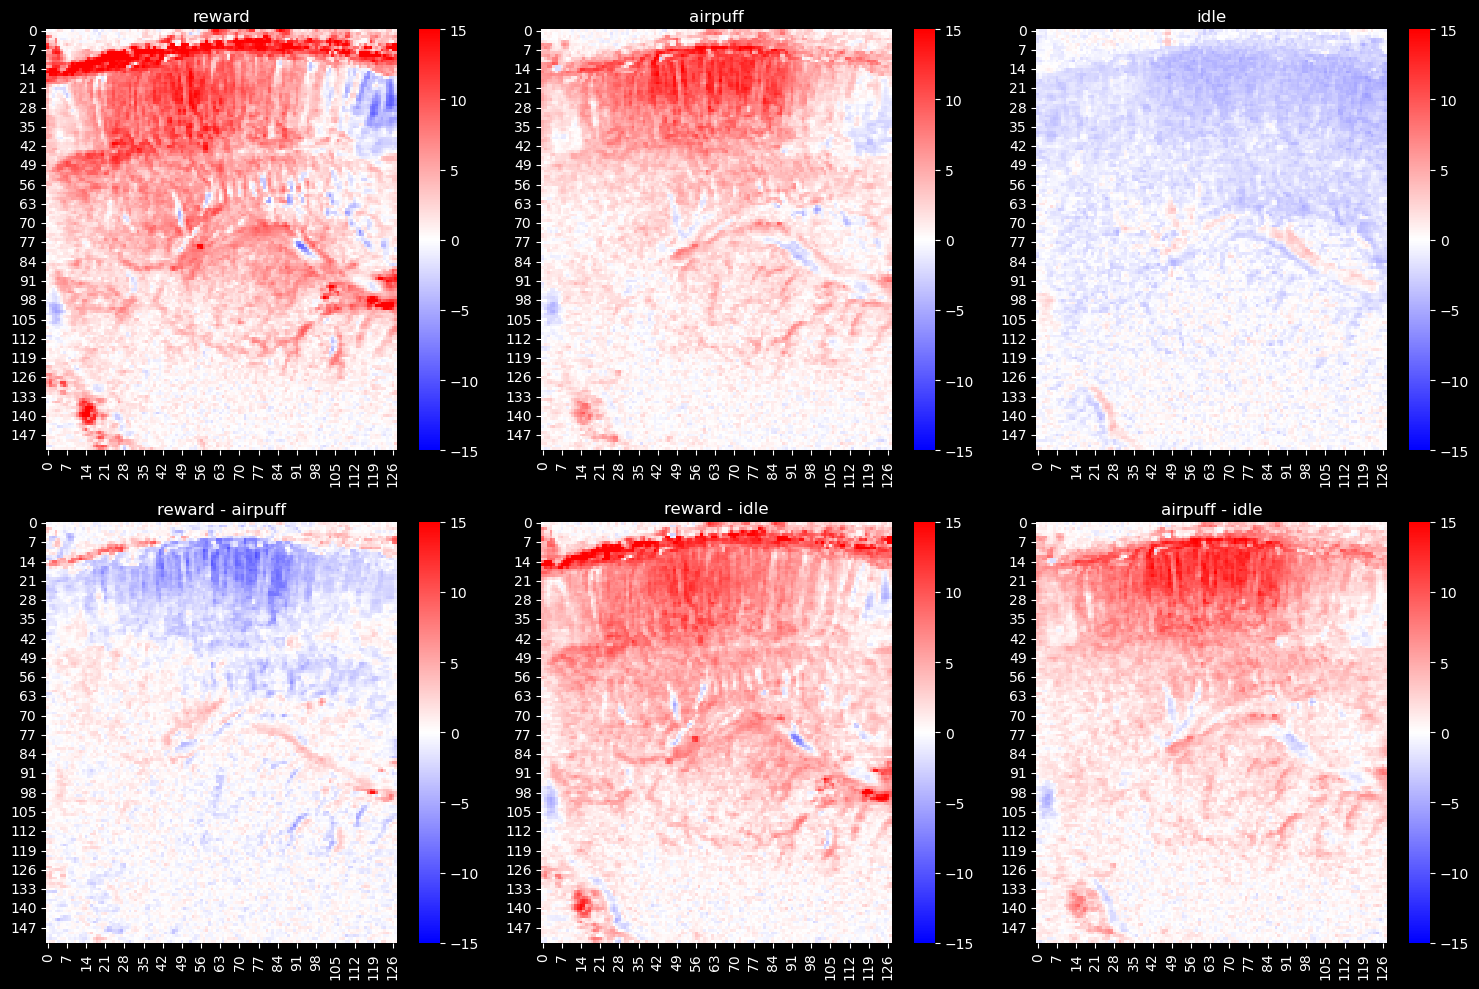

In [11]:
labels, estimators, X = run_glm_analysis(cleaned_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

### Raw data

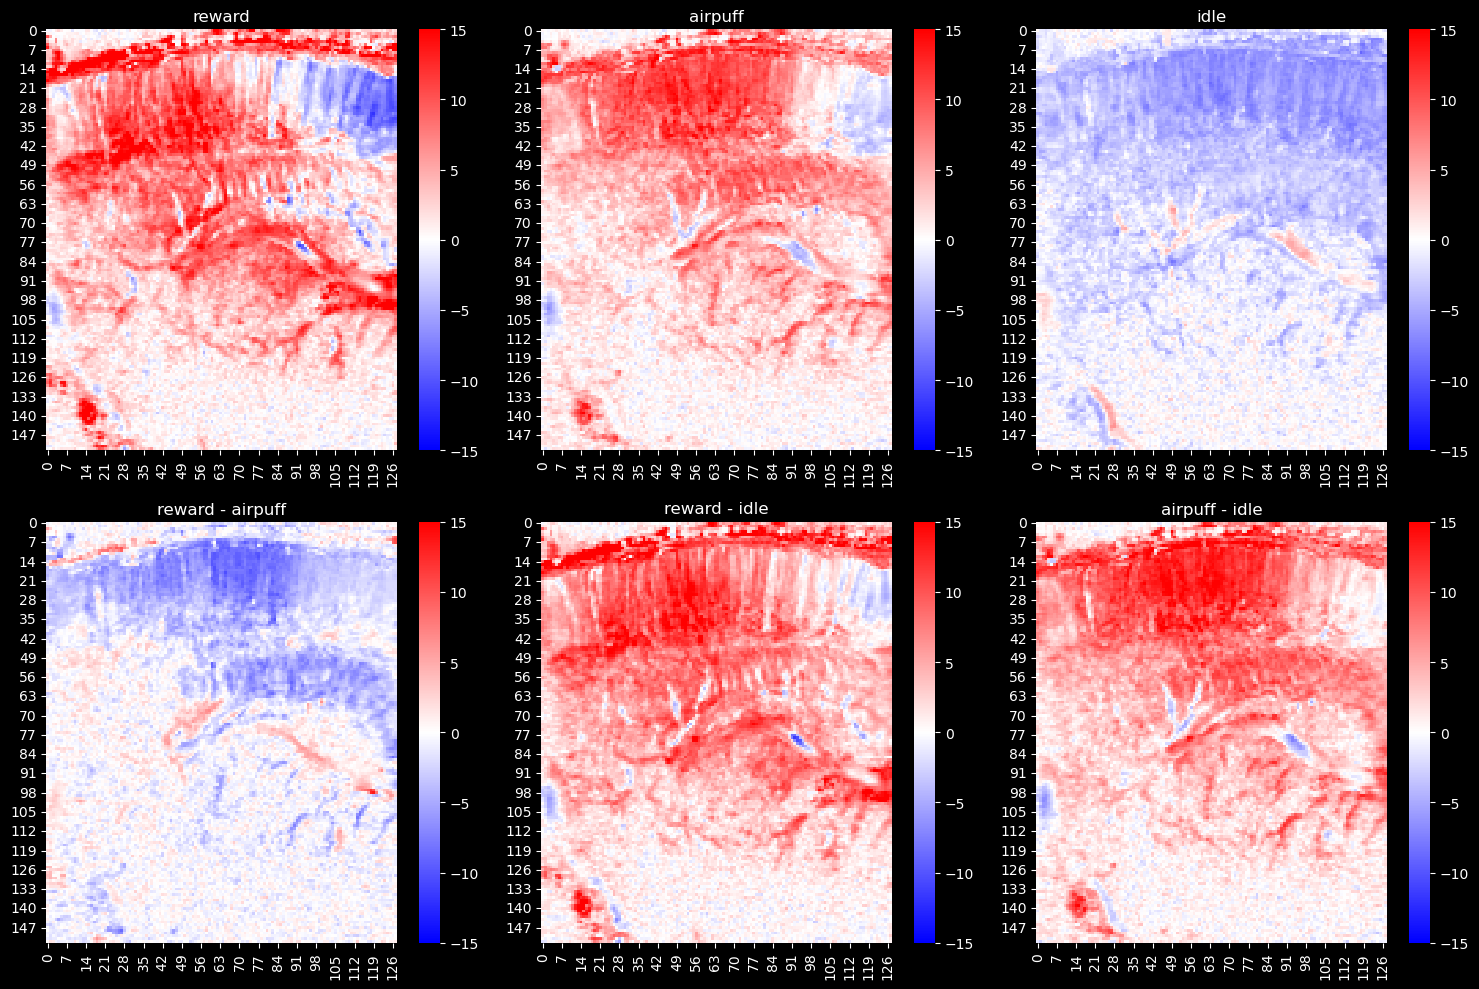

In [12]:
labels, estimators, X = run_glm_analysis(brain_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

## 1003

In [15]:
data_dir = os.path.join(zion_task_dir, '1003')
brain_file = 'Zion_1003_audiocue_plane5.5_2Dscan_1.nii'
event_file = 'mldata.mat'
brain_data, event_data = load_data(data_dir, brain_file, event_file)
tr = 1/2.5 
cleaner = FUSCleaner(detrend=True, standardize=False, low_pass=0.5, high_pass=0.01, fs=2.5, sigma=1)
cleaned_data = cleaner.clean(brain_data)
event_df = extract_event_df(event_data)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 9000)


### Cleaned data

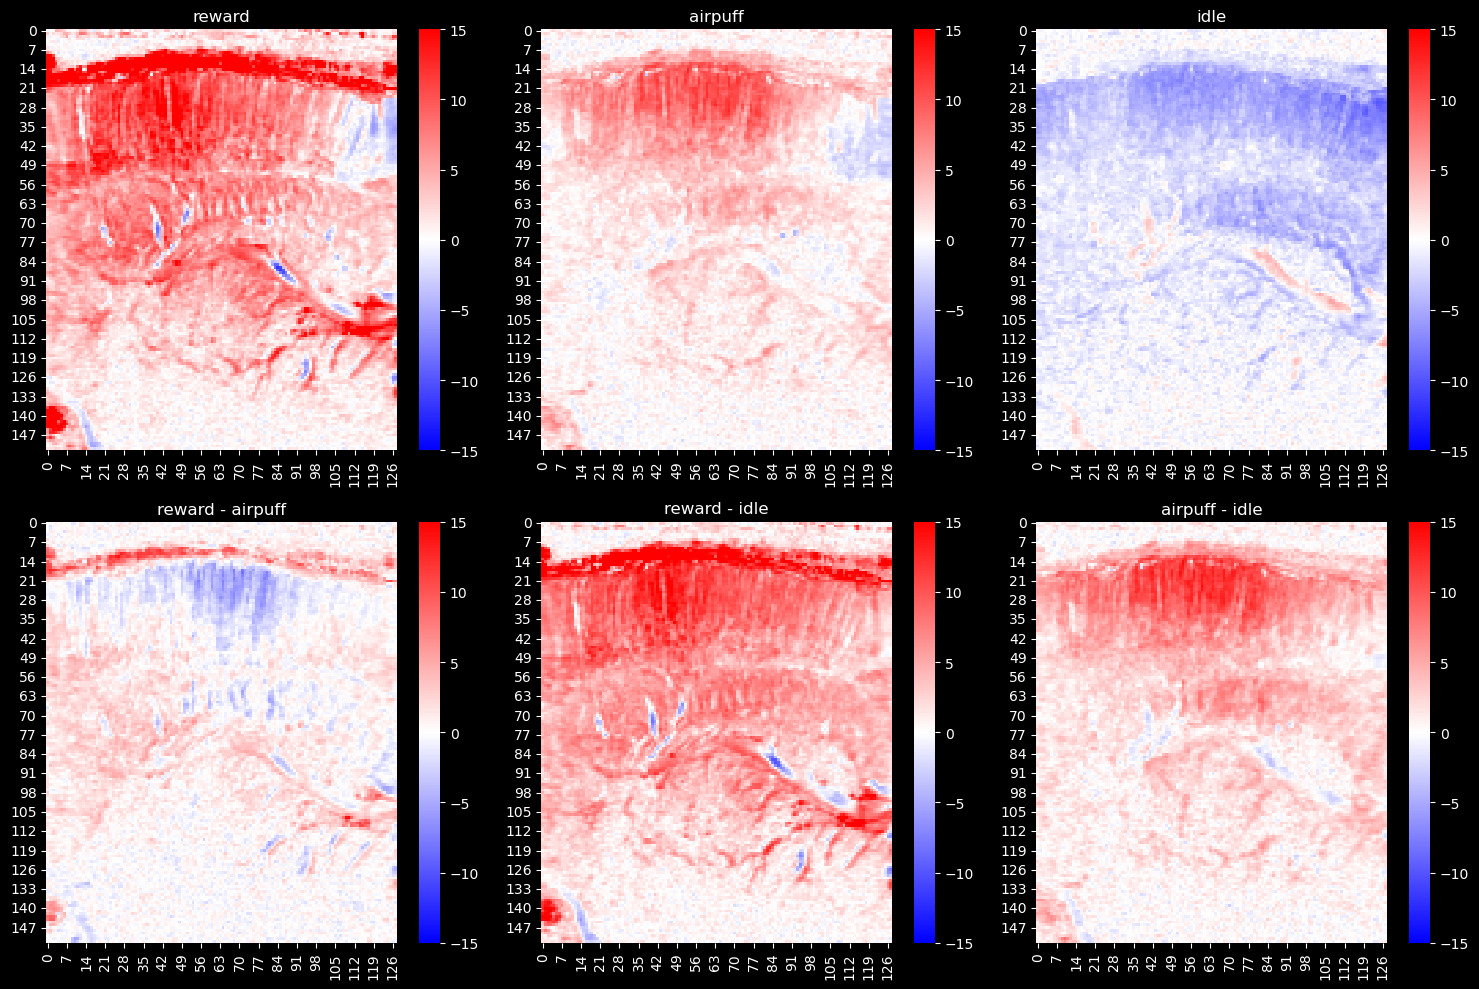

In [16]:
labels, estimators, X = run_glm_analysis(cleaned_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

### Raw data

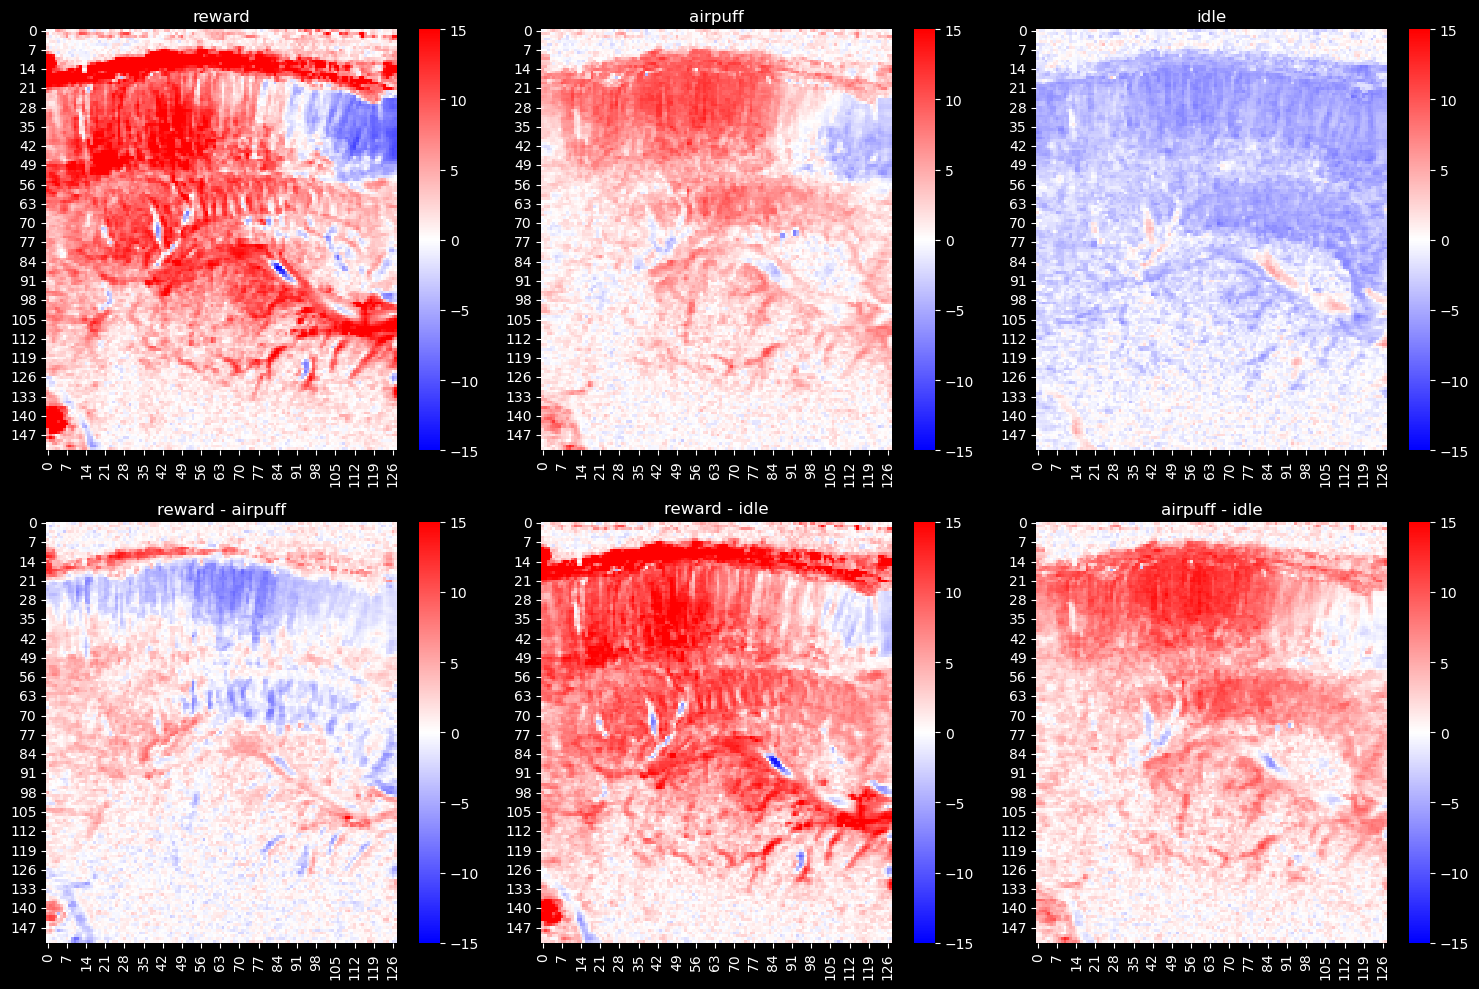

In [17]:
labels, estimators, X = run_glm_analysis(brain_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

## 1004

In [19]:
data_dir = os.path.join(zion_task_dir, '1004')
brain_file = 'Zion_1004_audiocue_P5.5_2Dscan_1.nii'
event_file = 'mldata.mat'
brain_data, event_data = load_data(data_dir, brain_file, event_file)
tr = 1/2.5 
cleaner = FUSCleaner(detrend=True, standardize=False, low_pass=0.5, high_pass=0.01, fs=2.5, sigma=1)
cleaned_data = cleaner.clean(brain_data)
event_df = extract_event_df(event_data)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 9000)


### Cleaned data

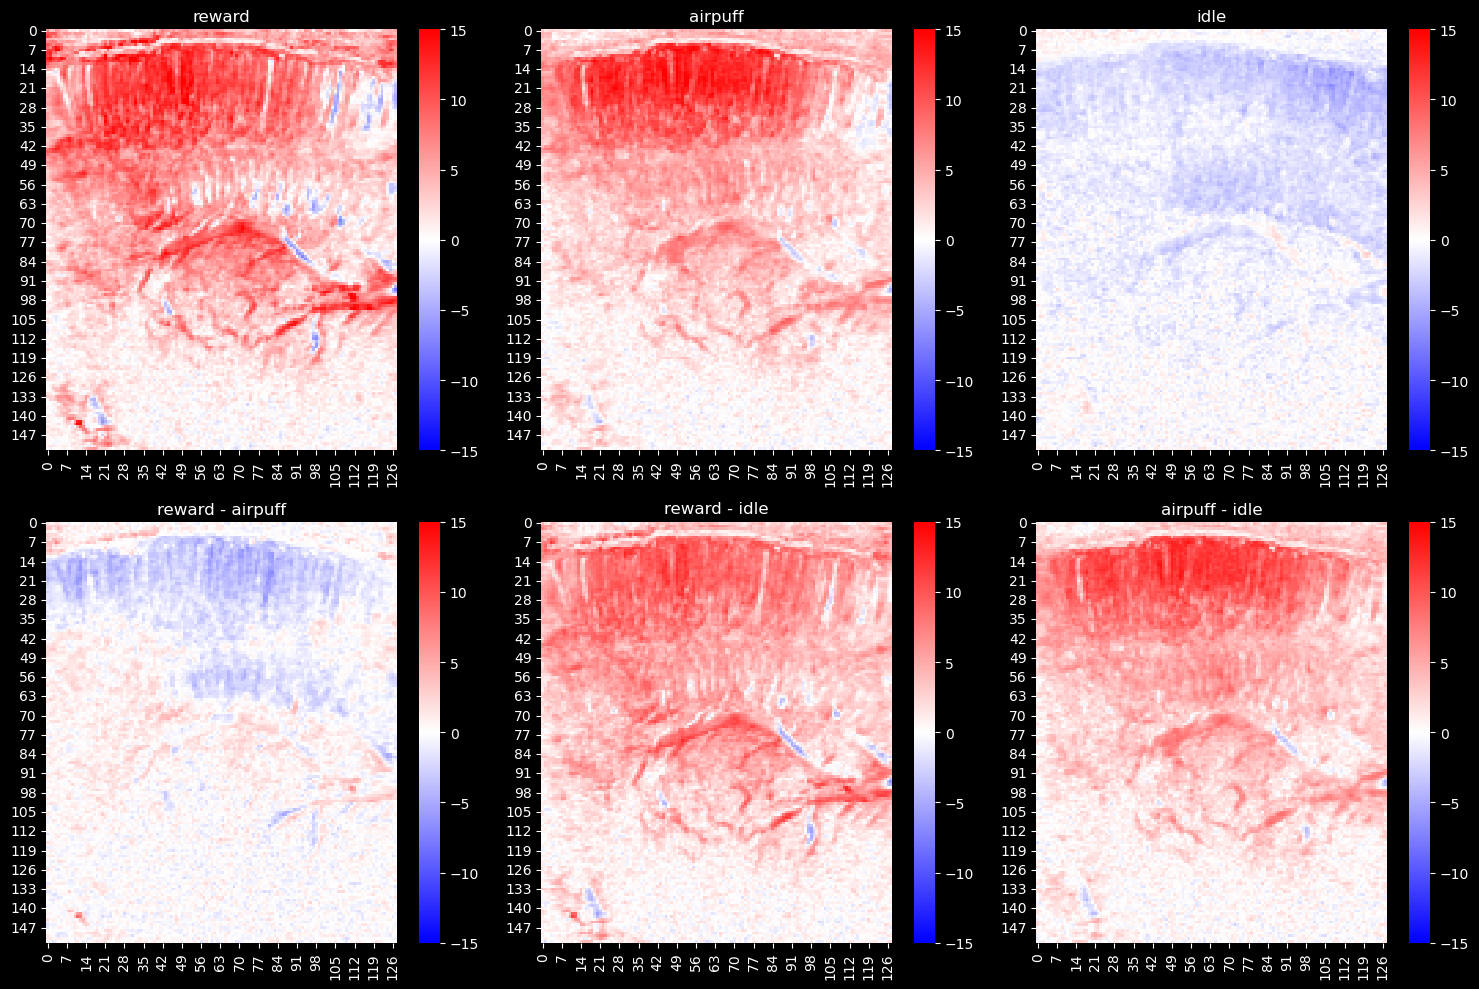

In [20]:
labels, estimators, X = run_glm_analysis(cleaned_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

### Raw data

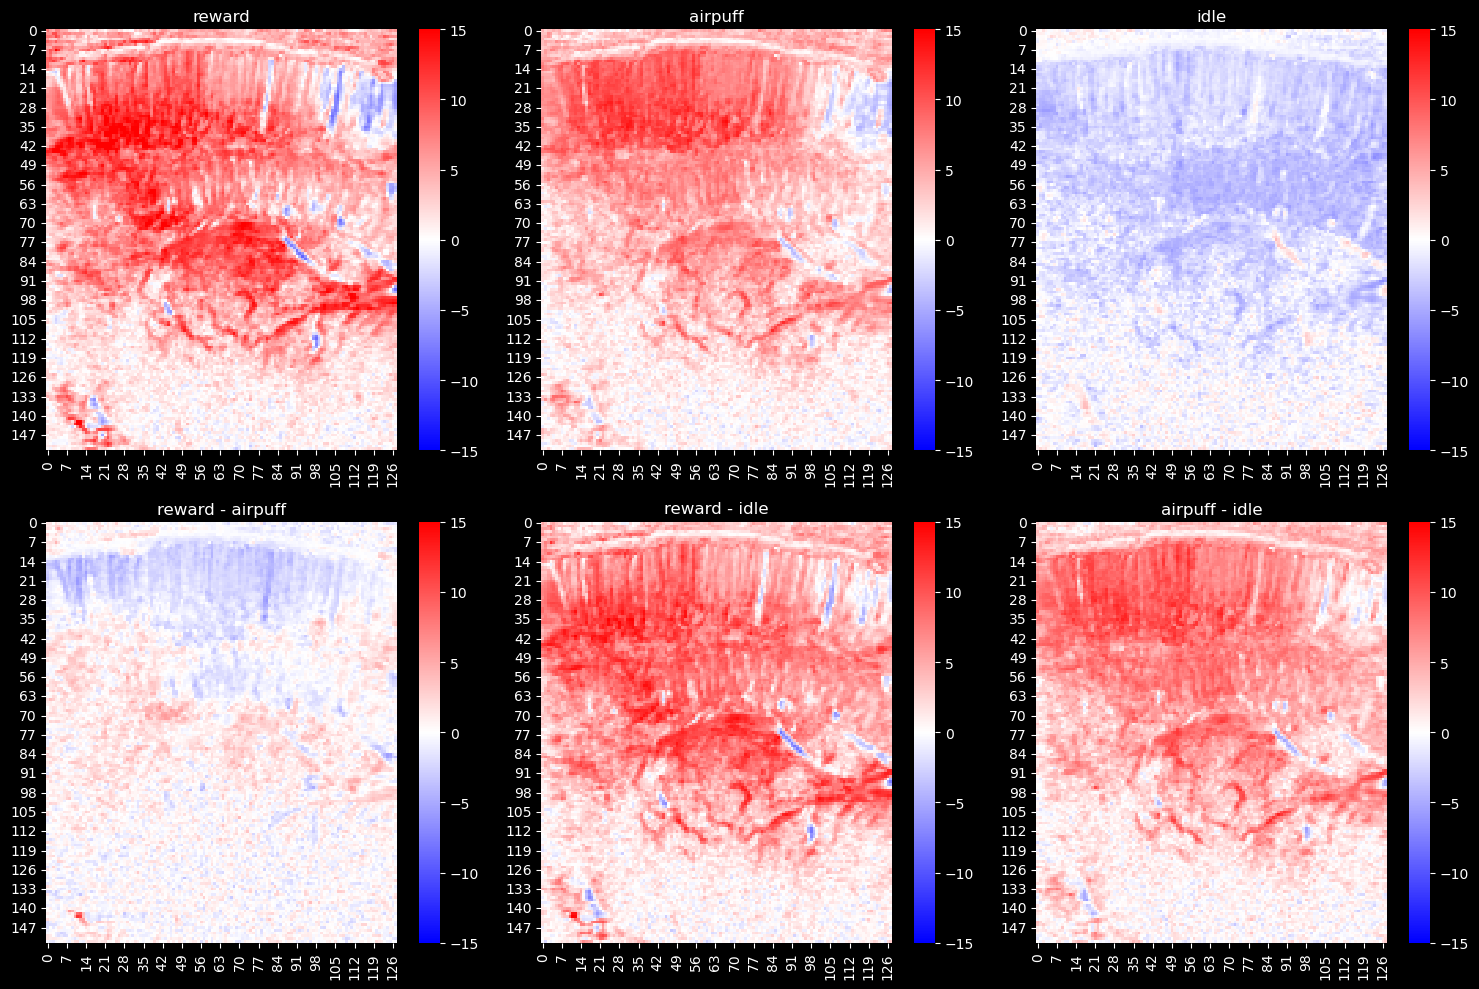

In [21]:
labels, estimators, X = run_glm_analysis(brain_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

# Grouper

## 1002

In [32]:
data_dir = os.path.join(grouper_task_dir, '1002')
brain_file = 'Grouper_1002_audiocue_plane5.5_2Dscan_1.nii'
event_file = 'mldata.mat'
brain_data, _ = load_data(data_dir, brain_file, event_file)
tr = 1/2.5 
cleaner = FUSCleaner(detrend=True, standardize=False, low_pass=0.5, high_pass=0.01, fs=2.5, sigma=1)
cleaned_data = cleaner.clean(brain_data)
event_data = sio.loadmat(os.path.join(data_dir, 'mldata.mat'))['mldata'][0]
event_df = extract_event_df(event_data)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 9000)


### Cleaned data

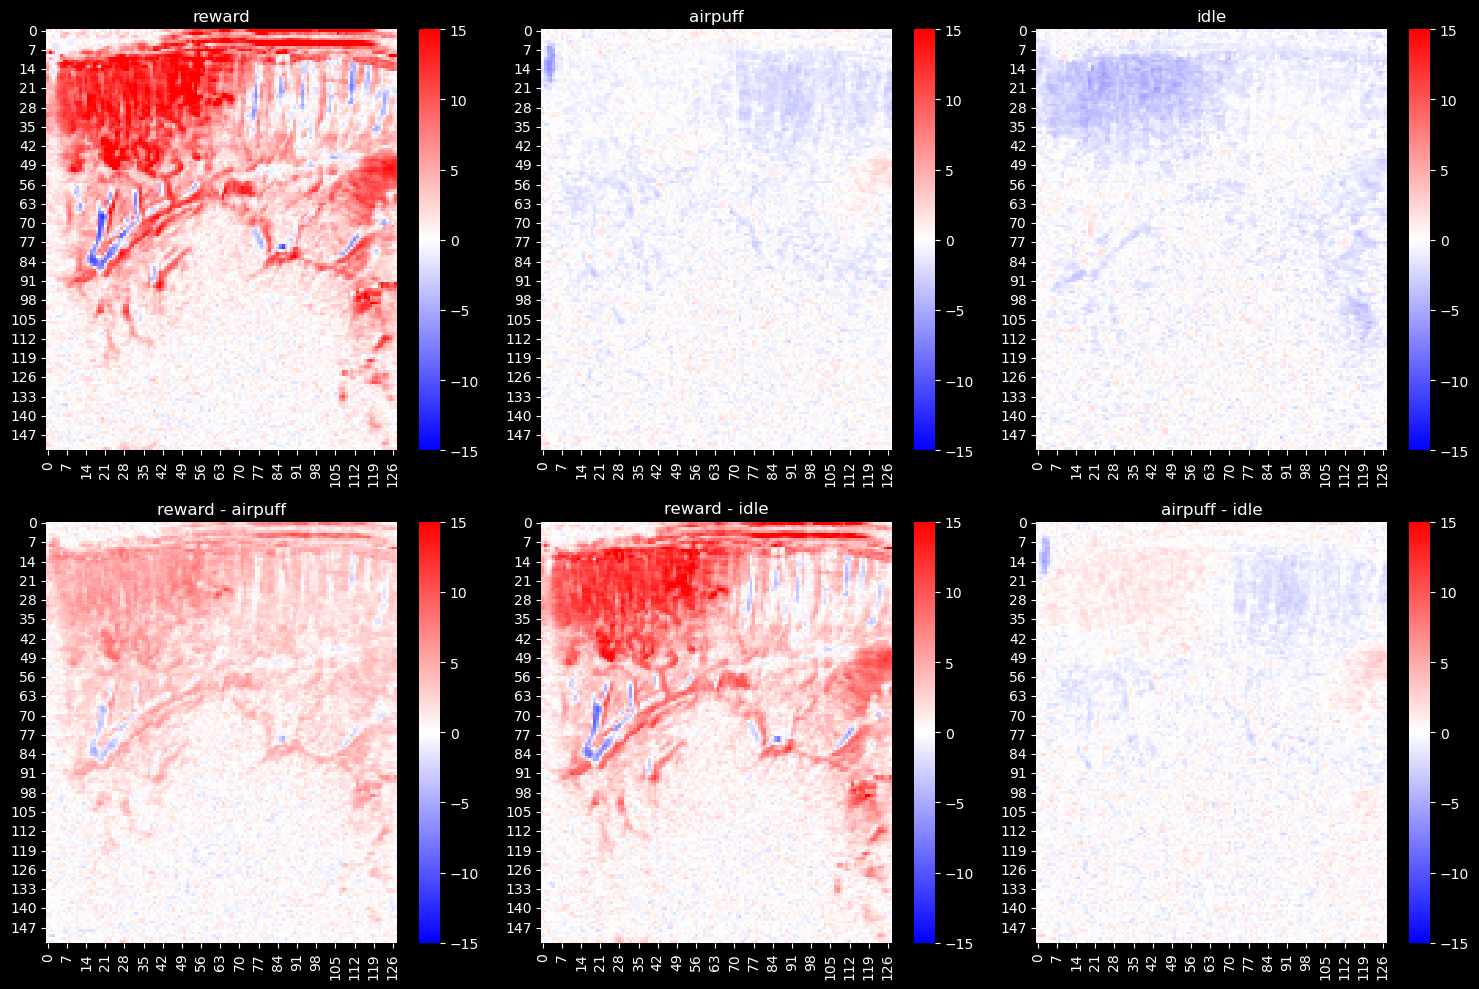

In [33]:
labels, estimators, X = run_glm_analysis(cleaned_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

###

### Raw data

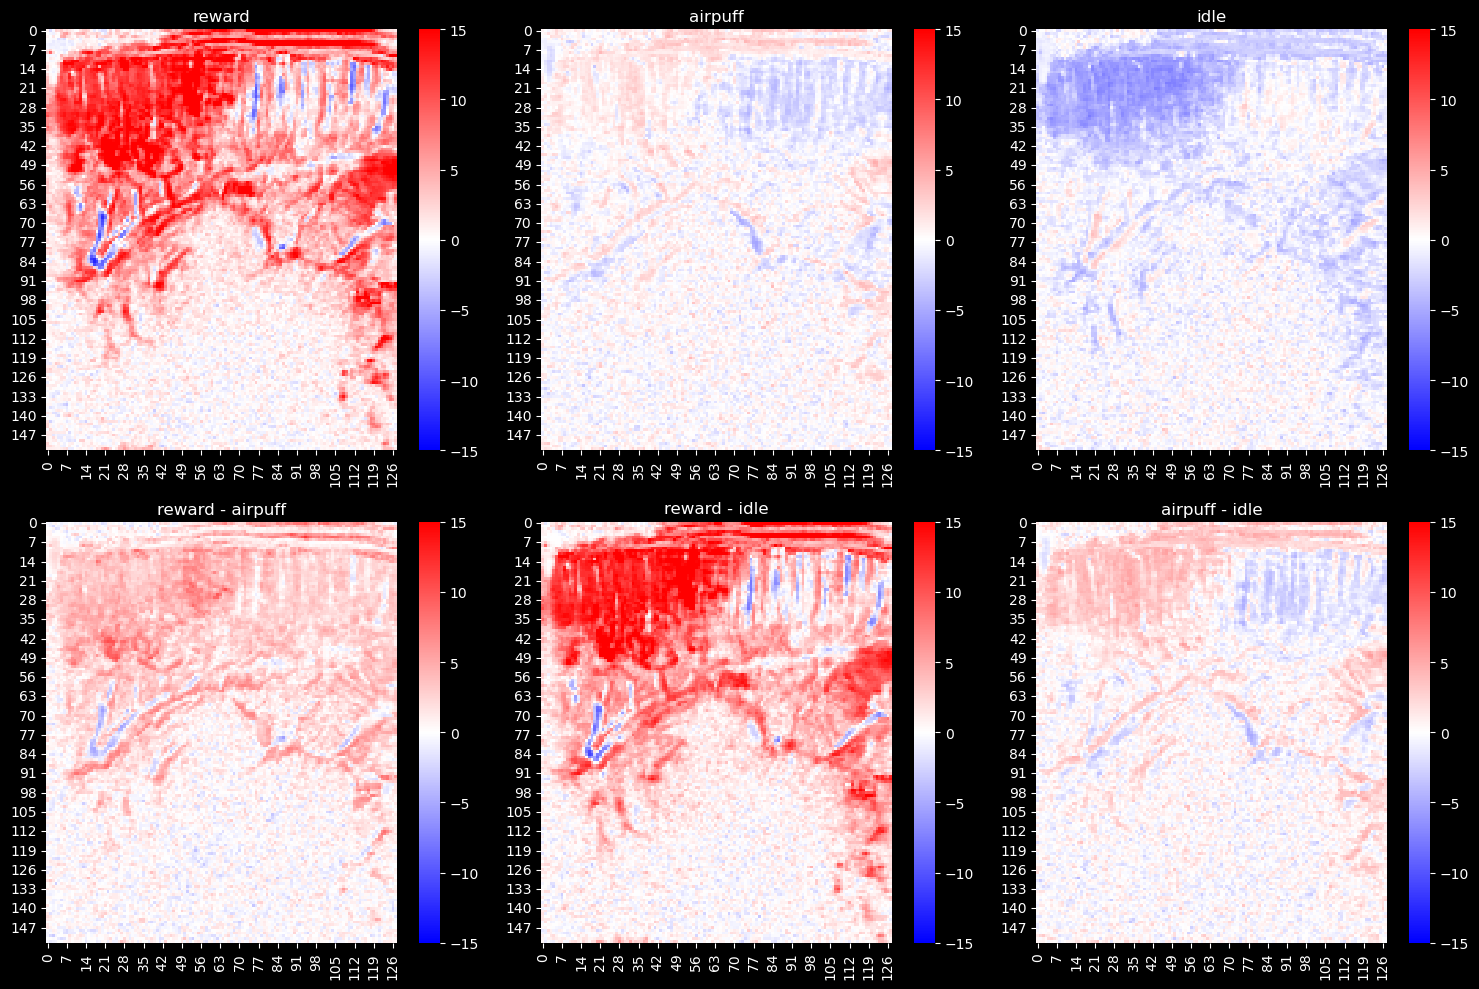

In [34]:
labels, estimators, X = run_glm_analysis(brain_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

## 1003

In [35]:
data_dir = os.path.join(grouper_task_dir, '1003')
brain_file = 'Grouper_1003_audiocue_plane5.5_2Dscan_1.nii'
event_file = 'mldata.mat'
brain_data, event_data = load_data(data_dir, brain_file, event_file)
tr = 1/2.5 
cleaner = FUSCleaner(detrend=True, standardize=False, low_pass=0.5, high_pass=0.01, fs=2.5, sigma=1)
cleaned_data = cleaner.clean(brain_data)
# event_data = sio.loadmat(os.path.join(data_dir, 'mldata.mat'))['mldata'][0]
event_df = extract_event_df(event_data)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 9000)


### Cleaned data

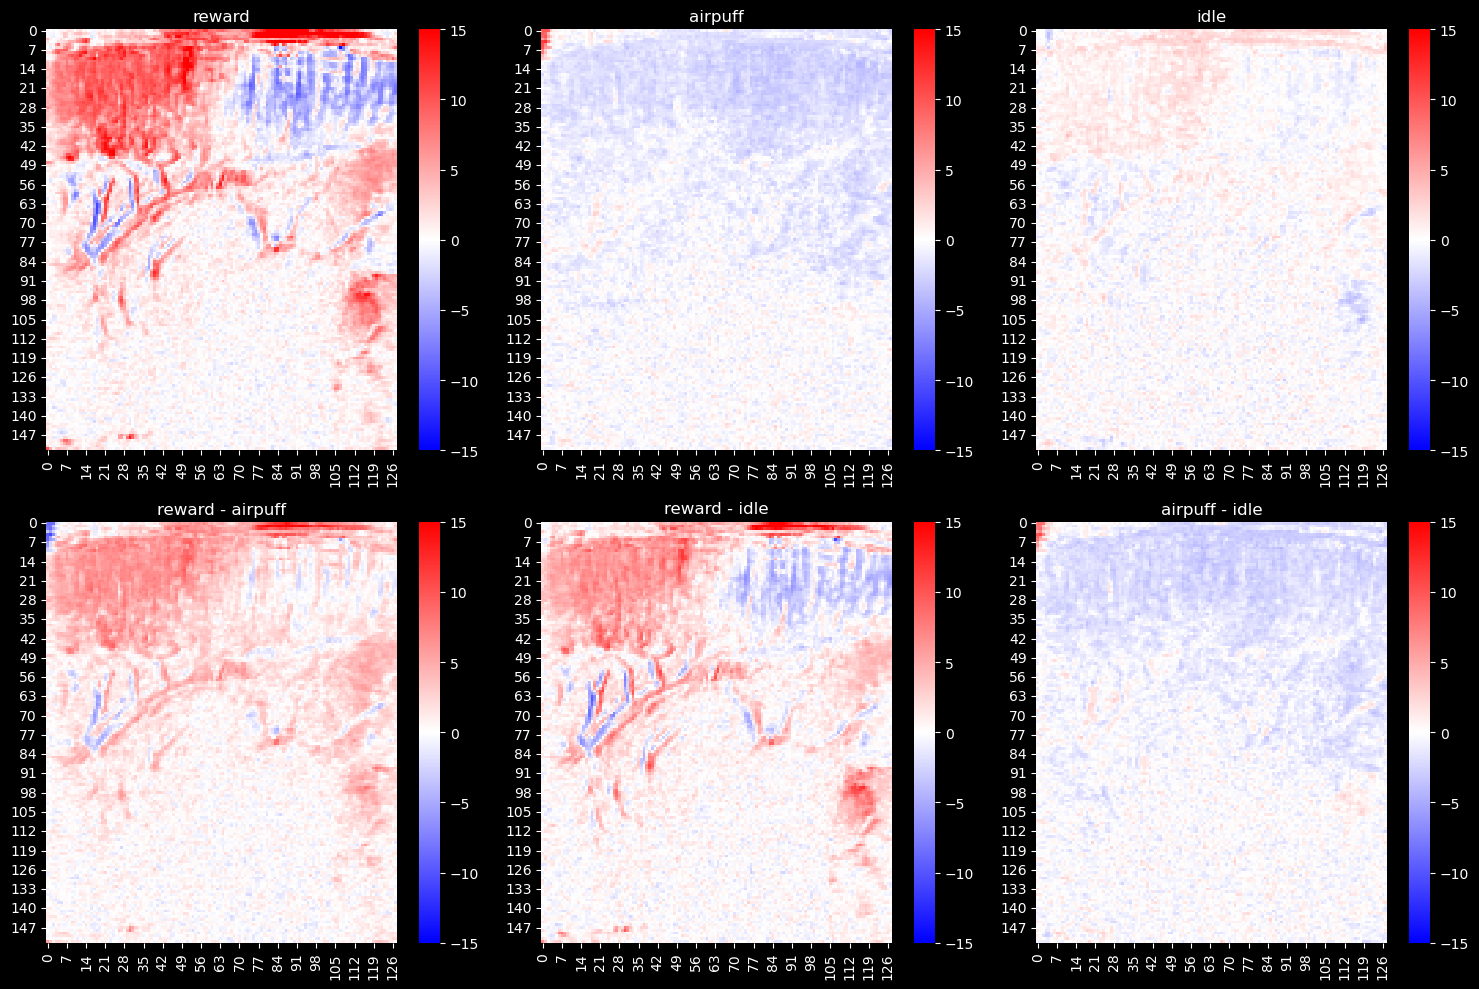

In [36]:
labels, estimators, X = run_glm_analysis(cleaned_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

### Raw data

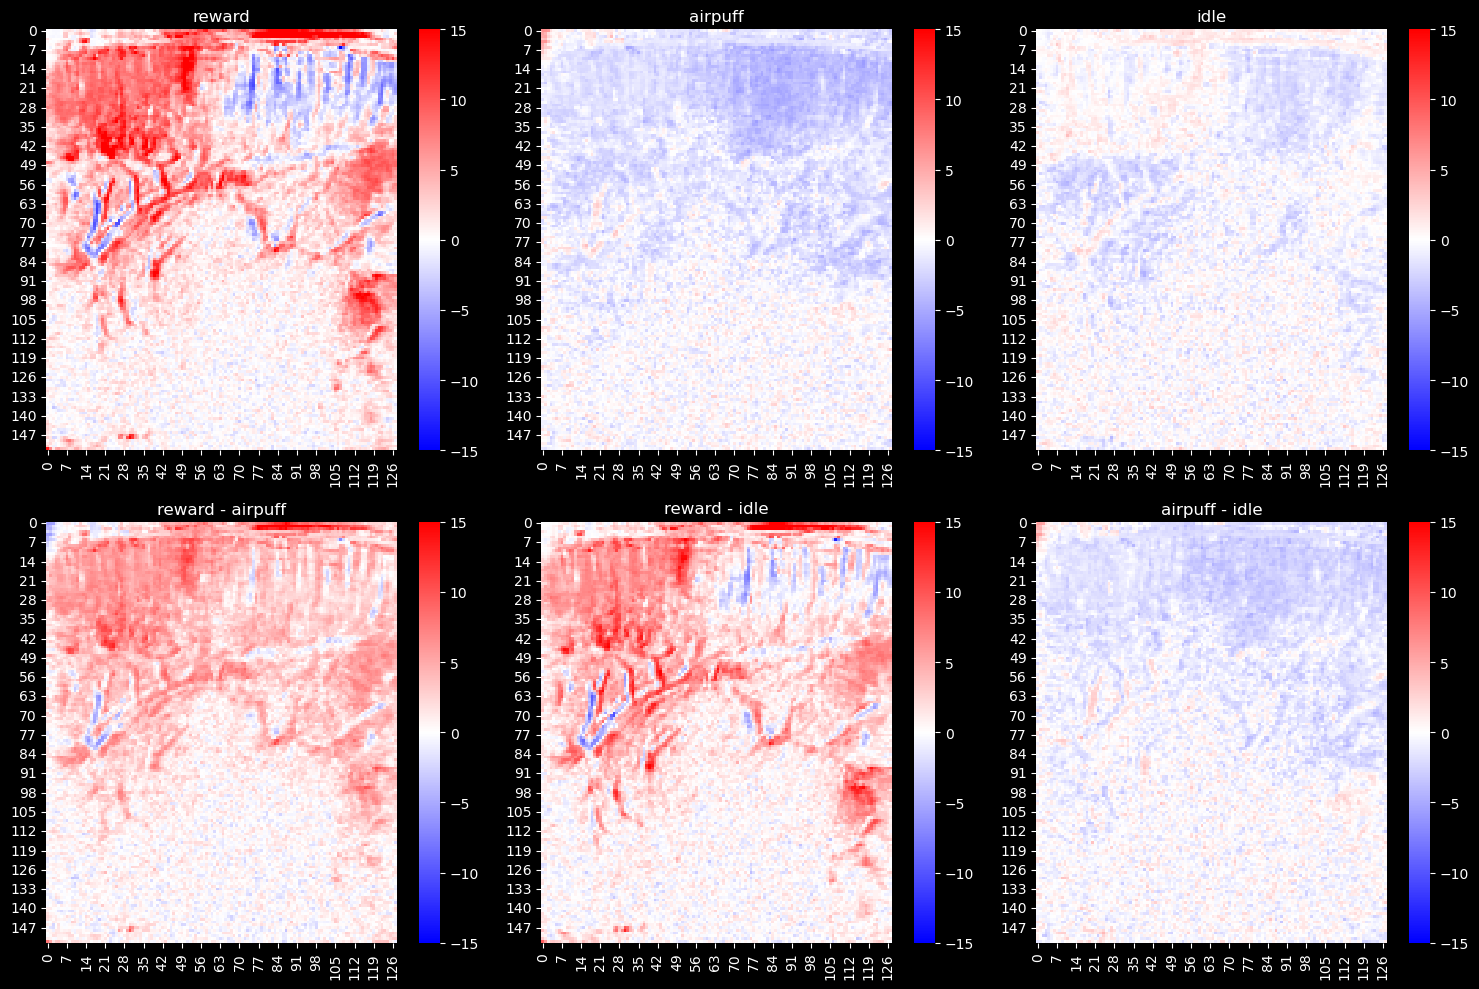

In [37]:
labels, estimators, X = run_glm_analysis(brain_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

## 1004

In [38]:
data_dir = os.path.join(grouper_task_dir, '1004')
brain_file = 'Grouper_audiocue_1004__P5.5_2Dscan_1.nii'
event_file = 'mldata.mat'
brain_data, event_data = load_data(data_dir, brain_file, event_file)
tr = 1/2.5 
cleaner = FUSCleaner(detrend=True, standardize=False, low_pass=0.5, high_pass=0.01, fs=2.5, sigma=1)
cleaned_data = cleaner.clean(brain_data)
# event_data = sio.loadmat(os.path.join(data_dir, 'mldata.mat'))['mldata'][0]
event_df = extract_event_df(event_data)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 9000)


### Cleaned data

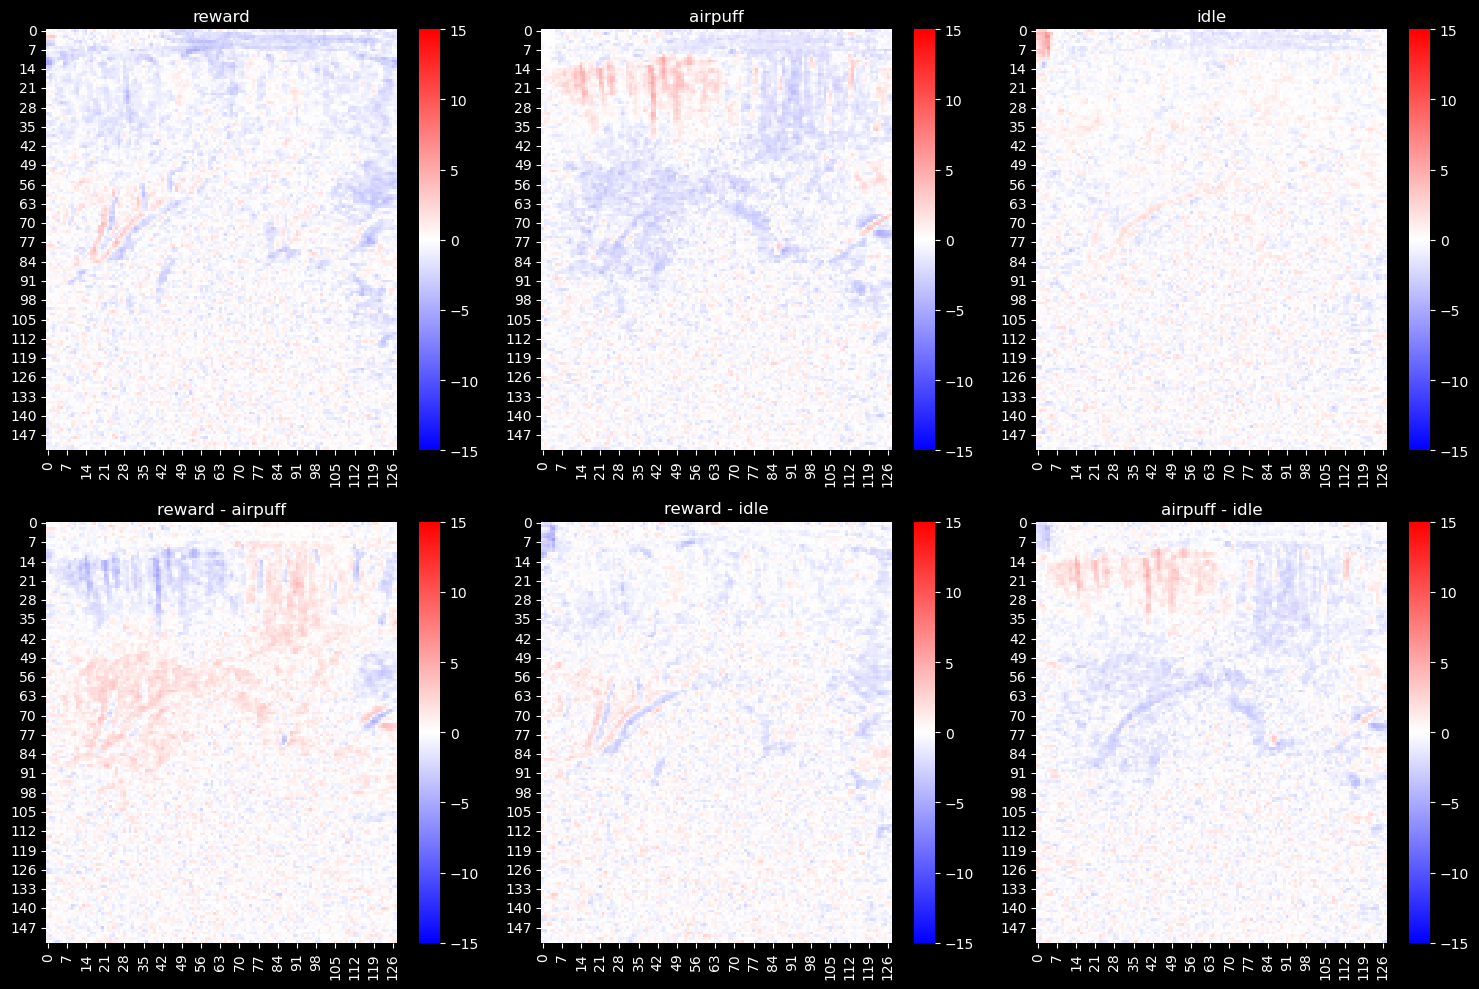

In [39]:
labels, estimators, X = run_glm_analysis(cleaned_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)

### Raw data

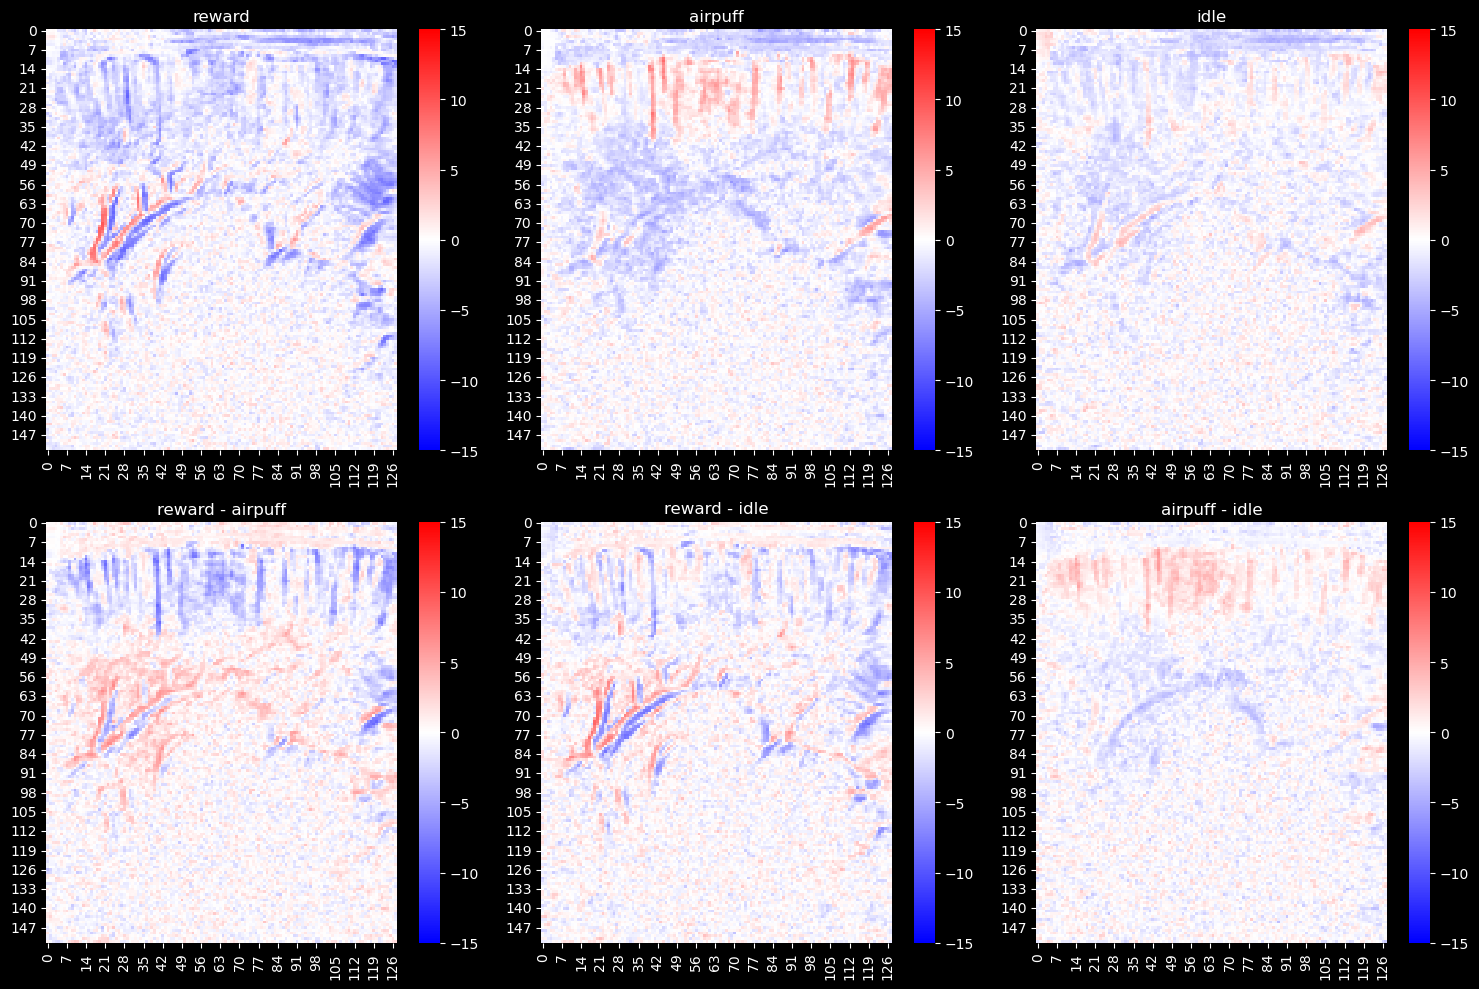

In [40]:
labels, estimators, X = run_glm_analysis(brain_data, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
plot_contrasts(contrast_results, brain_data.shape)